In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [57]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [58]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_rpp_with_mnt_2048.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_rpp_with_mnt_2048.csv False 2048


In [59]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 36 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1133 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1133 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1133 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1133 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

In [60]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
 'shenzhi-

In [61]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04',
  'Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 36 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00                   1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02                   1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04                   1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.06                   1133 non-null   object
 6   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00                    1133 non-null   object
 7   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-

In [63]:
variant = "rpp"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']
Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00: {'meteor': 0.47892081926016034, 'sacrebleu': {'score': 18.953782447211417, 'counts': [14728, 6825, 3776, 2214], 'totals': [28290, 27157, 26024, 24895], 'precisions': [52.06079886885826, 25.131641933939683, 14.509683369197663, 8.893352078730668], 'bp': 0.9350441410013948, 'sys_len': 28290, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18953782447211412, 'precisions': [0.5206079886885825, 0.25131641933939686, 0.14509683369197662, 0.0889335207873067], 'brevity_penalty': 0.9350441410013948, 'length_ratio': 0.937065253395164, 'translation_length': 28290, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.505641471965615, 'rouge2': 0.26650397564177, 'rougeL': 0.4521569211424892, 'rougeLsum': 0.45215253252350385}, 'accuracy': 0.015

model   rpp    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.478921  18.953782   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.479684  19.013749   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.476363  18.520633   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.467964  17.982474   
4                      Qwen/Qwen2-7B-Instruct  1.00  0.442241  14.388149   
5                      Qwen/Qwen2-7B-Instruct  1.02  0.440100  15.161723   
6                      Qwen/Qwen2-7B-Instruct  1.04  0.439014  14.958632   
7                      Qwen/Qwen2-7B-Instruct  1.06  0.432832  14.280874   
8                      Qwen/Qwen2-7B-Instruct  1.08  0.423561  13.659684   
9                      Qwen/Qwen2-7B-Instruct  1.10  0.413505  12.922650   
10               internlm/internlm2_5-7b-chat  1.00  0.429000  14.734882   
11               internlm/internlm2_5-7b-chat  1.02  0.426625  14.583817   
12               internlm/internlm2_5-7b-chat  1.04  0.415459  13.534659   
13               internlm/internlm2_5-7b-chat  1.06  0.403959  12.346741   
14               internlm/internlm2_5-7b-chat  1.08  0.387318  11.075675   
15               internlm/internlm2_5-7b-chat  1.10  0.376931  10.305164   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.461111  17.879150   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457152  17.436885   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.456047  17.440173   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.452042  16.895233   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.444211  16.166238   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.437984  15.601723   
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.433633  15.209541   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432905  15.191022   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432048  15.051352   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.427543  14.449131   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420663  13.933704   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.411121  13.303738   
28  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406834  13.565137   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406491  13.429876   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.405486  13.295092   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.401473  13.108608   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.398702  12.850538   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.393224  12.361162   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.189538  0.452157        0.0          0.098853           0.098853   
1   0.190137  0.451971        0.0          0.081200           0.081200   
2   0.185206  0.448942        0.0          0.105031           0.105031   
3   0.179825  0.441041        0.0          0.073257           0.073257   
4   0.143881  0.416165        0.0         12.812886          12.812886   
5   0.151617  0.416465        0.0          7.156222           7.156222   
6   0.149586  0.414371        0.0          0.185349           0.185349   
7   0.142809  0.407254        0.0          0.203001           0.203001   
8   0.136597  0.396774        0.0          0.221536           0.221536   
9   0.129226  0.387937        0.0          0.177405           0.177405   
10  0.147349  0.409666        0.0         12.751103          12.751103   
11  0.145838  0.407349        0.0          9.824360           9.824360   
12  0.135347  0.397052        0.0          6.527802           6.527802   
13  0.123467  0.387397        0.0          6.533981           6.533981   
14  0.110757  0.372770        0.0          9.820830           9.820830   
15  0.103052  0.363630        0.0          6.525154           6.525154   
16  0.178791  0.434057        0.0          0.088261           0.088261   
17  0.174369  0.431000        0.0          0.09

In [64]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu-rpp-4.txt
Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/l40-4gpu-8.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/openai-training-sample.jsonl
Loading content of logs/tune-qwen2-70b.txt


model   rpp  eval_time
30               internlm/internlm2_5-7b-chat  1.00   3.063548
31               internlm/internlm2_5-7b-chat  1.02   2.127979
32               internlm/internlm2_5-7b-chat  1.04   2.136805
33               internlm/internlm2_5-7b-chat  1.06   2.153575
34               internlm/internlm2_5-7b-chat  1.08   2.148279
35               internlm/internlm2_5-7b-chat  1.10   2.172109
36                     Qwen/Qwen2-7B-Instruct  1.00   2.216240
37                     Qwen/Qwen2-7B-Instruct  1.02   1.586055
38                     Qwen/Qwen2-7B-Instruct  1.04   1.012357
39                     Qwen/Qwen2-7B-Instruct  1.06   1.002648
40                     Qwen/Qwen2-7B-Instruct  1.08   1.000883
41                     Qwen/Qwen2-7B-Instruct  1.10   1.011474
42  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00   1.187114
43  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02   1.810238
44  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04   1.159753
45  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06   1.165049
46  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08   1.168579
47  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10   1.156222
48      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00   1.762577
49      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02   1.749338
50      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04   1.046778
51      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06   1.045013
52      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08   1.042365
53      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10   1.045896
64                    Qwen/Qwen2-72B-Instruct  1.08  15.924095
65                    Qwen/Qwen2-72B-Instruct  1.10  15.984996
66     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  16.127979
67     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  15.987643
68     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  15.958517
69     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  15.998235
70     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  15.891439
71     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  15.981465
72                    Qwen/Qwen2-72B-Instruct  1.00  15.931156
73                    Qwen/Qwen2-72B-Instruct  1.02  15.855252
74                    Qwen/Qwen2-72B-Instruct  1.04  15.786408
75                    Qwen/Qwen2-72B-Instruct  1.06  15.872021

In [65]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model   rpp    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.478921  18.953782   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.479684  19.013749   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.476363  18.520633   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.467964  17.982474   
4                      Qwen/Qwen2-7B-Instruct  1.00  0.442241  14.388149   
5                      Qwen/Qwen2-7B-Instruct  1.02  0.440100  15.161723   
6                      Qwen/Qwen2-7B-Instruct  1.04  0.439014  14.958632   
7                      Qwen/Qwen2-7B-Instruct  1.06  0.432832  14.280874   
8                      Qwen/Qwen2-7B-Instruct  1.08  0.423561  13.659684   
9                      Qwen/Qwen2-7B-Instruct  1.10  0.413505  12.922650   
10               internlm/internlm2_5-7b-chat  1.00  0.429000  14.734882   
11               internlm/internlm2_5-7b-chat  1.02  0.426625  14.583817   
12               internlm/internlm2_5-7b-chat  1.04  0.415459  13.534659   
13               internlm/internlm2_5-7b-chat  1.06  0.403959  12.346741   
14               internlm/internlm2_5-7b-chat  1.08  0.387318  11.075675   
15               internlm/internlm2_5-7b-chat  1.10  0.376931  10.305164   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.461111  17.879150   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457152  17.436885   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.456047  17.440173   
19     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.452042  16.895233   
20     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.444211  16.166238   
21     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.437984  15.601723   
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.433633  15.209541   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432905  15.191022   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432048  15.051352   
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.427543  14.449131   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420663  13.933704   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.411121  13.303738   
28  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406834  13.565137   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406491  13.429876   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.405486  13.295092   
31  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.401473  13.108608   
32  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.398702  12.850538   
33  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.393224  12.361162   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.189538  0.452157        0.0          0.098853           0.098853   
1   0.190137  0.451971        0.0          0.081200           0.081200   
2   0.185206  0.448942        0.0          0.105031           0.105031   
3   0.179825  0.441041        0.0          0.073257           0.073257   
4   0.143881  0.416165        0.0         12.812886          12.812886   
5   0.151617  0.416465        0.0          7.156222           7.156222   
6   0.149586  0.414371        0.0          0.185349           0.185349   
7   0.142809  0.407254        0.0          0.203001           0.203001   
8   0.136597  0.396774        0.0          0.221536           0.221536   
9   0.129226  0.387937        0.0          0.177405           0.177405   
10  0.147349  0.409666        0.0         12.751103          12.751103   
11  0.145838  0.407349        0.0          9.824360           9.824360   
12  0.135347  0.397052        0.0          6.527802           6.527802   
13  0.123467  0.387397        0.0          6.533981           6.533981   
14  0.110757  0.372770        0.0          9.820830           9.820830   
15  0.103052  0.363630        0.0          6.525154           6.525154   
16  0.178791  0.434057        0.0          0.088261           0.088261   
17  0.174369  0.431000        0.0          0.09

In [66]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [67]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [68]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [69]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.67 if len(columns) > 1 else -0.4),
    )

    plt.show()

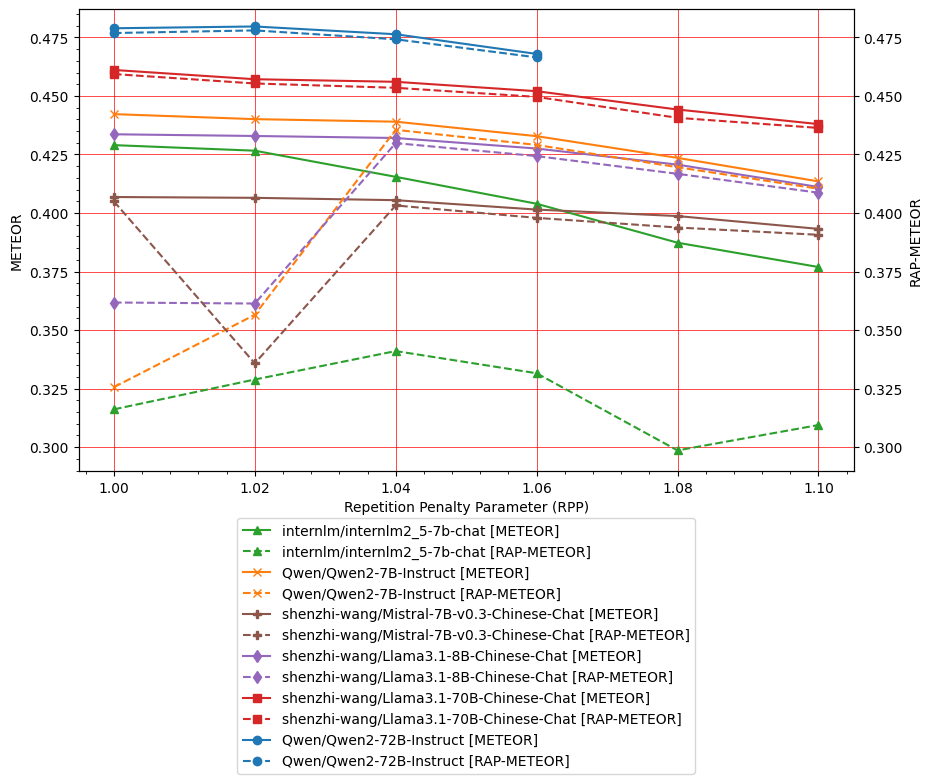

In [70]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

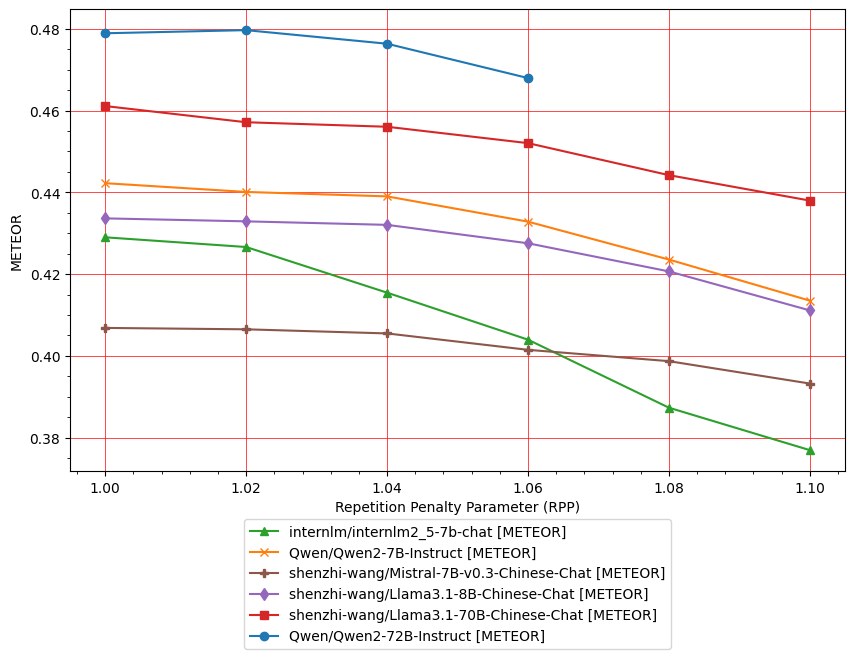

In [71]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

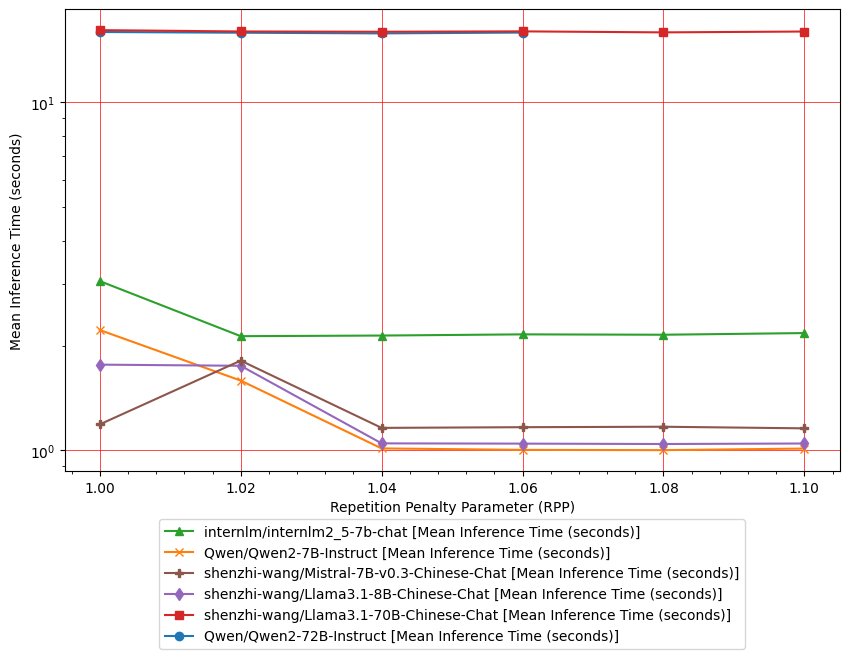

In [72]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    log_scales=[True],
)

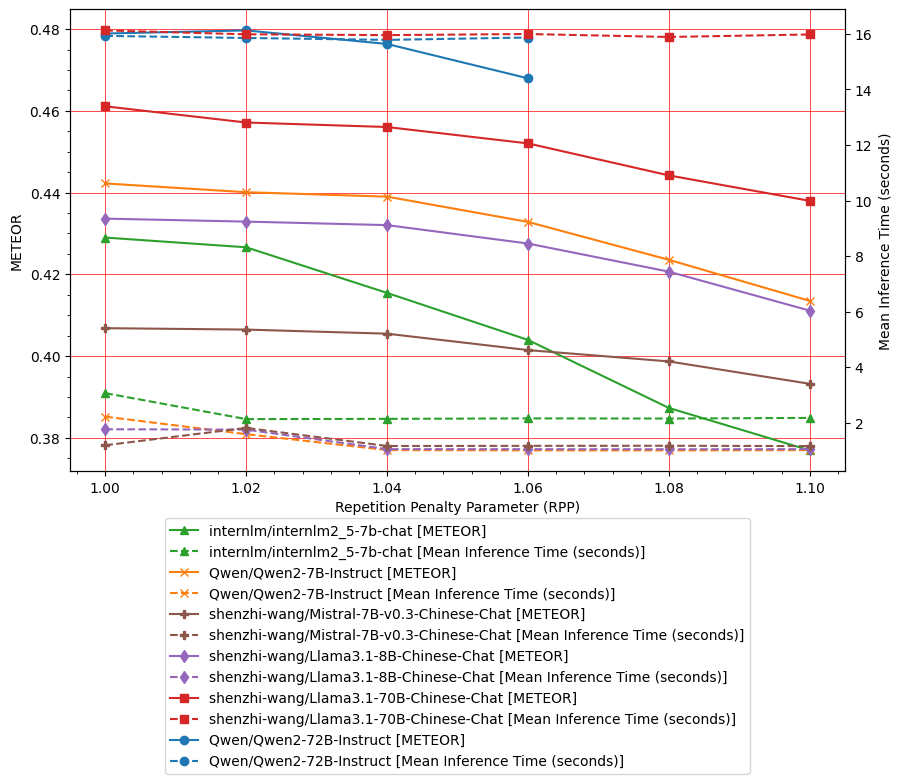

In [73]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
)

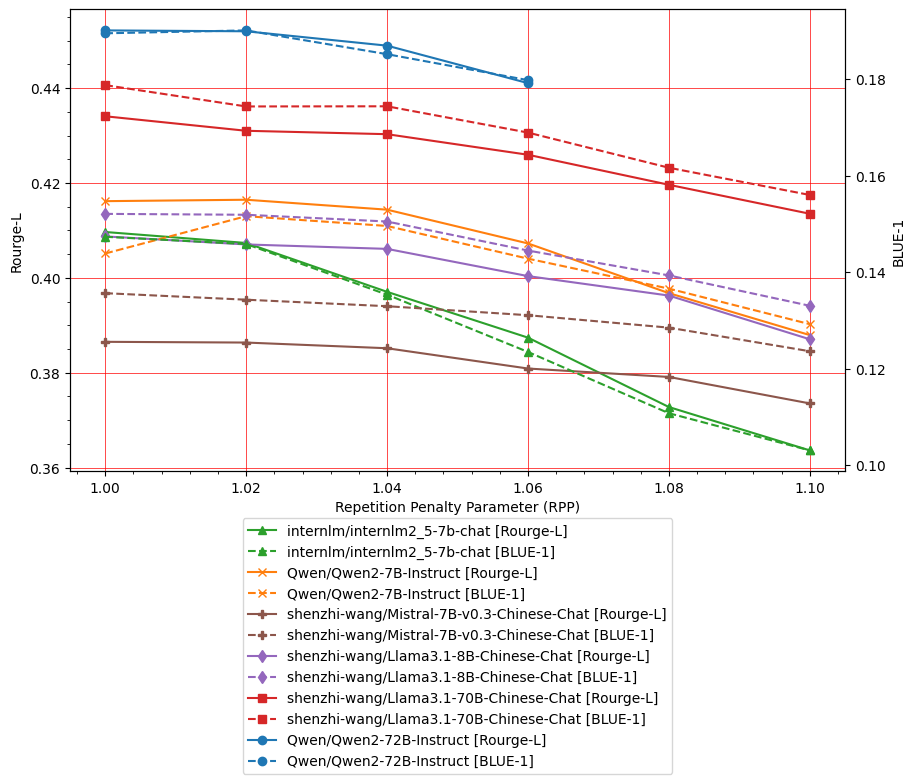

In [74]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

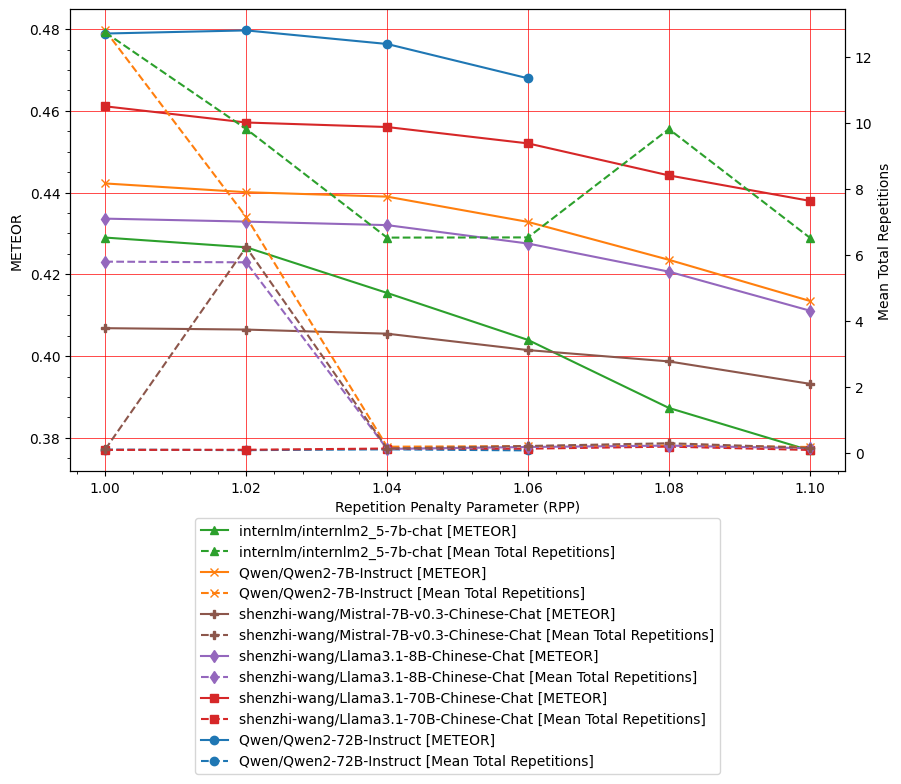

In [75]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

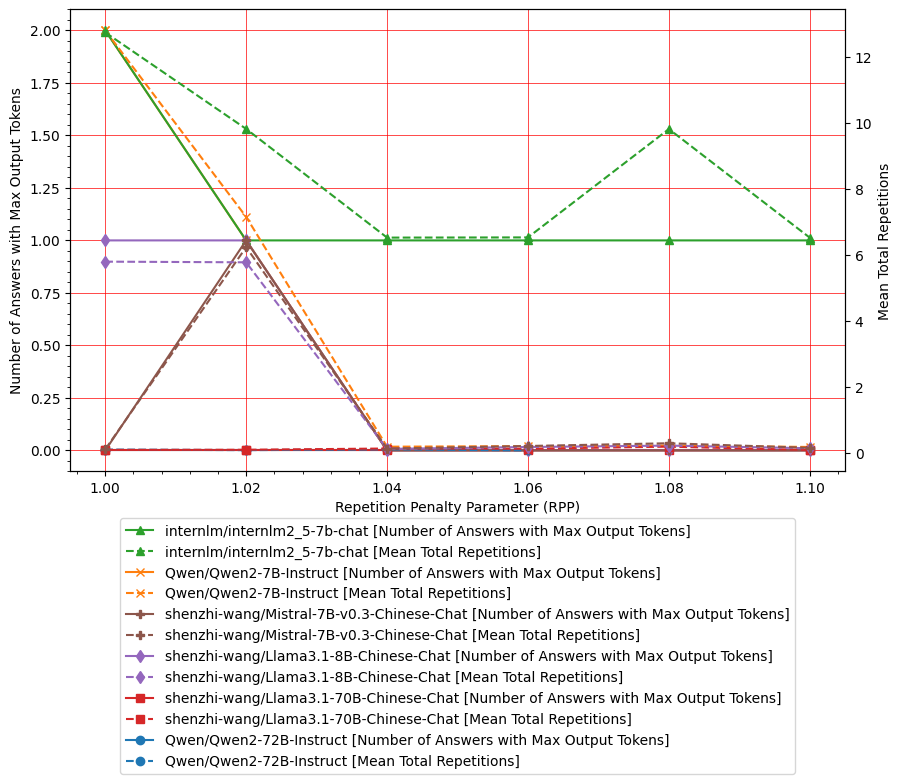

In [76]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

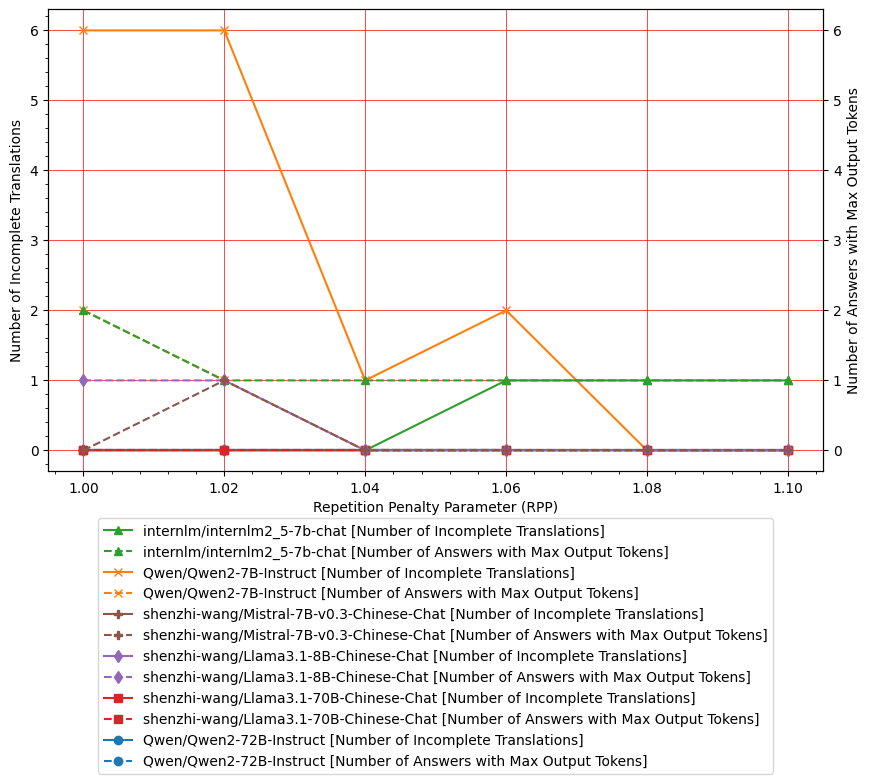

In [77]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_incomplete_translations", "num_max_output_tokens"],
    ["Number of Incomplete Translations", "Number of Answers with Max Output Tokens"],
    sync_y_axis=True,
)

In [78]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.00
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02

*** Found 0 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.02
### Analyzing: Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/checkpoint-560/rpp-1.04

*** Found 0 rows with incomplete 

In [79]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [80]:
metrics_df.describe()

meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  34.000000  34.000000  34.000000  34.000000       34.0   
mean    0.429769  14.811517   0.148115   0.406544        0.0   
std     0.026453   2.189626   0.021896   0.023410        0.0   
min     0.376931  10.305164   0.103052   0.363630        0.0   
25%     0.407905  13.335273   0.133353   0.387138        0.0   
50%     0.430524  14.516474   0.145165   0.407148        0.0   
75%     0.443718  16.025109   0.160251   0.418829        0.0   
max     0.479684  19.013749   0.190137   0.452157        0.0   

       repetition_score  total_repetitions        rap  \
count         34.000000          34.000000  34.000000   
mean           2.739993           2.739993   0.400643   
std            4.082736           4.082736   0.053551   
min            0.073257           0.073257   0.298598   
25%            0.120035           0.120035   0.357727   
50%            0.186231           0.186231   0.409525   
75%            6.128420           6.128420   0.439585   
max           12.812886          12.812886   0.478005   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    34.000000              34.000000  34.000000  
mean                      0.529412               0.382353   5.775323  
std                       1.461326               0.603761   6.676763  
min                       0.000000               0.000000   1.000883  
25%                       0.000000               0.000000   1.157105  
50%                       0.000000               0.000000   1.969109  
75%                       0.000000               1.000000  15.838041  
max                       6.000000               2.000000  16.127979